In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time 

def load_data(file_path):
    """Load book rating data from CSV."""
    return pd.read_csv(file_path)

def preprocess_data(data):
    """Pivot the data to create a matrix of users and book ratings."""
    pivot_table = data.pivot_table(index='UserID', columns='BookTitle', values='Rating')
    pivot_table.fillna(0, inplace=True)  # Fill NaN values with 0
    return pivot_table

def calculate_similarity(pivot_table):
    """Calculate cosine similarity between users based on ratings."""
    similarity_matrix = cosine_similarity(pivot_table)
    return pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

def get_recommendations(user_id, similarity_matrix, pivot_table, num_recommendations=5):
    """Generate book recommendations based on similar users."""
    similar_users = similarity_matrix[user_id].sort_values(ascending=False).index[1:]  # Exclude the user themself
    similar_users_ratings = pivot_table.loc[similar_users]
    
    # Weighted average recommendation score
    recommendation_score = similar_users_ratings.apply(np.mean, axis=0)
    top_recommendations = recommendation_score.sort_values(ascending=False).head(num_recommendations)
    print(f"Recommendation_score:",recommendation_score)
    return top_recommendations.index.tolist()

def plot_popular_books(data):
    """Plot the most popular books based on average ratings."""
    book_popularity = data.groupby('BookTitle')['Rating'].mean().sort_values(ascending=False).head(10)
    print(f"\n book_popularity:",book_popularity)
    book_popularity.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Popular Books')
    plt.xlabel('Book Title')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()


Pivot_Table:
 BookTitle  1984  Pride and Prejudice  The Catcher in the Rye  \
UserID                                                         
1           4.0                  0.0                     4.0   
2           5.0                  4.0                     0.0   
3           0.0                  0.0                     3.0   
4           3.0                  5.0                     0.0   
5           0.0                  3.0                     0.0   
6           5.0                  0.0                     4.0   

BookTitle  The Great Gatsby  The Hobbit  The Lord of the Rings  \
UserID                                                           
1                       3.0         0.0                    0.0   
2                       0.0         5.0                    0.0   
3                       5.0         4.0                    0.0   
4                       4.0         0.0                    5.0   
5                       0.0         3.0                    4.0   
6          

Enter a user ID to get book recommendations:  1


Recommendation_score: BookTitle
1984                      2.6
Pride and Prejudice       2.4
The Catcher in the Rye    1.4
The Great Gatsby          2.6
The Hobbit                2.4
The Lord of the Rings     2.4
To Kill a Mockingbird     2.2
dtype: float64

Top book recommendations for user 1:
1. 1984
2. The Great Gatsby
3. Pride and Prejudice
4. The Hobbit
5. The Lord of the Rings

 book_popularity: BookTitle
1984                      4.250000
Pride and Prejudice       4.000000
The Great Gatsby          4.000000
The Hobbit                4.000000
The Lord of the Rings     4.000000
To Kill a Mockingbird     4.000000
The Catcher in the Rye    3.666667
Name: Rating, dtype: float64


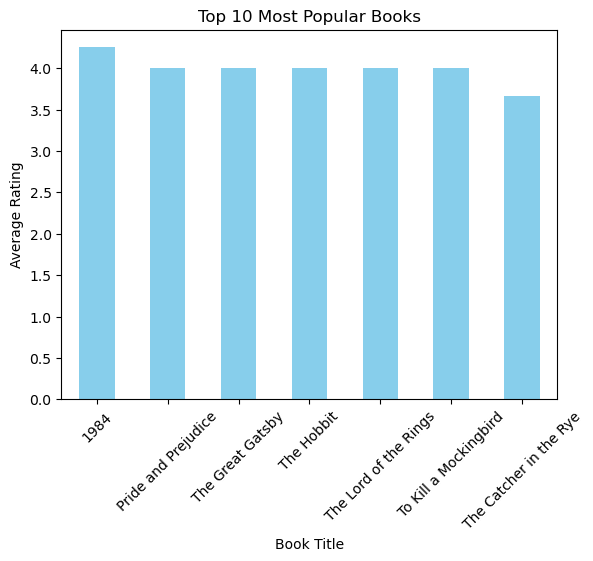


Total time to run the program: 2.2992 seconds


In [19]:
def main():
    start_time = time.time()
    # Load data
    file_path = r"D:\OneDrive\Desktop\PHD 1st sem\Python Lab\book_ratings.csv"
    data = load_data(file_path)
    
    # Preprocess data
    pivot_table = preprocess_data(data)
    print(f"Pivot_Table:\n",pivot_table)
    
    # Calculate similarity matrix
    similarity_matrix = calculate_similarity(pivot_table)
    print(f"Similarity_Matrix:\n",similarity_matrix)
    
    # Interactive recommendation
    print("Welcome to the Book Recommendation System!")
    try:
        user_id = int(input("Enter a user ID to get book recommendations: "))
        if user_id not in pivot_table.index:
            print(f"No data available for user {user_id}. Please try a different ID.")
            return
        
        recommendations = get_recommendations(user_id, similarity_matrix, pivot_table)
        print(f"\nTop book recommendations for user {user_id}:")
        for i, book in enumerate(recommendations, 1):
            print(f"{i}. {book}")
        
    except ValueError:
        print("Invalid input. Please enter a valid user ID.")
  
    
    plot_popular_books(data)

    end_time = time.time()  # End time tracking
    total_time = end_time - start_time  # Calculate the time taken
    print(f"\nTotal time to run the program: {total_time:.4f} seconds")

# Run the main function in the notebook
main()
